In [64]:
import numpy as np
import matplotlib.pyplot as plt


Using the Maxwell equations of magnetostatics (in their integral form) one can derive the vector potential of a current density distribution $$ \vec{j}(\vec{r}) $$

$$ 
\vec{A}(\vec{r})=\frac{\mu_0}{4\pi}\int\frac{\vec{j}(\vec{r}')}{|\vec{r}-\vec{r}'|}\,\mathrm{d}V'\\
$$

from which we can calculate the magnetic field 

$$ 
\vec{B}(\vec{r})=\nabla\times\vec{A}(\vec{r})\\
$$
Let's take the current density for a wire with radius 1 m, 
$$J=(J_0 r \;) \hat z$$

In [ ]:
# initial values for the variables
mu0= 4*np.pi *1e-7
j0=1
r0=1
l0=1
num_points=8


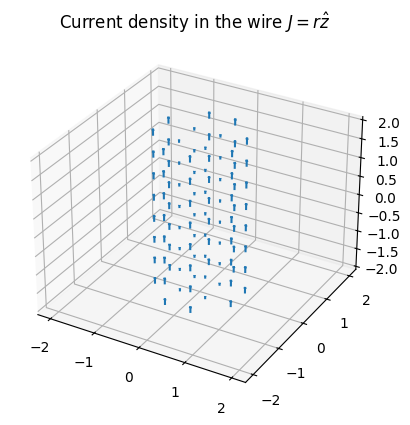

(512,)


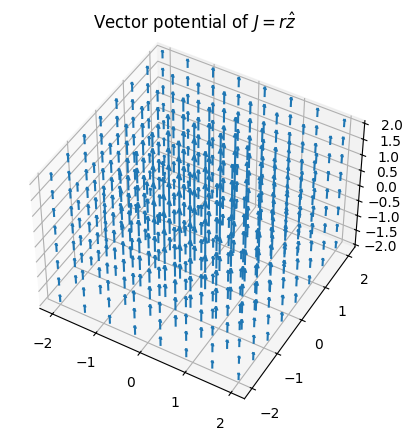

(8, 8, 8)


In [66]:
def j(x,y):
    radius=np.sqrt(x**2+y**2)
    return np.where(radius>r0,0,radius*j0)
mx=np.linspace(-2,2,num_points)
my=np.linspace(-2,2,num_points)
mz=np.linspace(-2,2,num_points)
x,y,z=np.meshgrid(mx,my,mz)

ax=plt.axes(projection="3d")
ax.quiver(x,y,z,0,0,j(x,y)/5)
plt.title("Current density in the wire $J=r \\hat z$")
#ax.view_init(elev=90)
plt.show()
def Az(r,x=x,y=y,z=z):
    R = np.sqrt((r[0]-x)**2 + (r[1]-y)**2 + (r[2]-z)**2)
    dv=(4/(num_points-1))**3
    J=j(x,y)
    R[R == 0]=np.inf
    js= J*dv/R
    return np.sum(js)
ax=plt.axes(projection="3d")

A_list=[]
for xs in mx:
    for ys in my:
        for zs in mz:
            A_list.append(Az(r=[xs,ys,zs]))
A_array=A_list
A_list=np.array(A_list)
print(A_list.shape)
A_list=A_list.reshape(x.shape)

ax.quiver(x,y,z,0,0,A_list/15) #scaling the vector field.
ax.view_init(elev=45)
plt.title("Vector potential of $J=r \\hat z$")
plt.show()
print(x.shape)

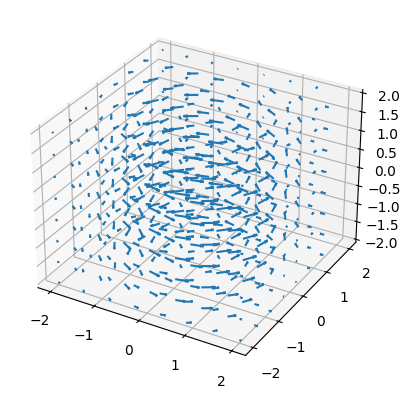

In [ ]:
# curl of the vector:
def curl(A_list=A_list,h=4/num_points):
    bx_list=[]
    by_list=[]
    for i in range(num_points):
        for j in range (num_points):
            for k in range (num_points):
                try:
                    bx=(A_list[i+1][j][k]-A_list[i-1][j][k])/(2*h)
                except:
                    bx=0
                try:
                    by=-(A_list[i][j+1][k]-A_list[i][j-1][k])/(2*h)
                except:
                    by=0
                bx_list.append(bx)
                by_list.append(by)
    return bx_list,by_list

bx_list, by_list=curl()

bx_mesh=np.reshape(bx_list,x.shape)
by_mesh=np.reshape(by_list,x.shape)
ax=plt.axes(projection="3d")
ax.quiver(x,y,z,bx_mesh/10,by_mesh/10,0)
#ax.view_init(elev=90)